# Lesson 14 Activity: Advanced Statistics - Solution

## Learning Objectives

This activity will help you to:

1. Apply appropriate statistical tests to real-world data
2. Interpret hypothesis test results and p-values
3. Compare multiple groups using statistical methods
4. Make data-driven conclusions based on statistical evidence

## Setup

Import the required libraries and load the weather dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

In [2]:
# Load the weather dataset
url = 'https://gperdrizet.github.io/FSA_devops/assets/data/unit2/weather.csv'
df = pd.read_csv(url)
df.head()

,weather_condition,wind_strength,temperature_c,rainfall_inches,humidity_percent,pressure_hpa
0,Sunny,Light Breeze,8.2,0.13,48.8,1016.5
1,Snowy,Gale,1.6,0.29,89.6,1009.4
2,Rainy,Strong Wind,7.3,0.01,100.0,1003.3
3,Cloudy,Light Breeze,21.6,0.62,49.3,1006.9
4,Sunny,Calm,12.0,1.09,38.6,1016.0


## Exercise 1: Humidity Differences Among Weather Conditions

**Objective**: Determine if humidity is significantly different among different weather conditions.

**Background**: 
The weather dataset contains humidity measurements for different weather conditions (Sunny, Rainy, Cloudy, etc.). We want to know if these weather conditions are associated with significantly different humidity levels.

**Tasks**:

1. **Explore the data**:
   - Check how many unique weather conditions are in the dataset
   - Calculate the mean and standard deviation of humidity for each weather condition
   - Create a boxplot showing the humidity distribution for each weather condition
   - Based on the visualization, do you think the humidity levels differ significantly?

2. **Choose an appropriate statistical test**:
   - Since we're comparing humidity across multiple groups (weather conditions), what test should we use?
   - Hint: Consider ANOVA (Analysis of Variance) or Kruskal-Wallis test
   - State your null and alternative hypotheses

3. **Check assumptions** (if using ANOVA):
   - Are the sample sizes roughly equal across groups?
   - Use a visualization or test to check if the data appears roughly normally distributed
   - Check for equal variances across groups (you can use a simple visual check or Levene's test)

4. **Perform the statistical test**:
   - Conduct the chosen test using scipy.stats
   - Report the test statistic and p-value
   - Using α = 0.05, determine whether to reject or accept the null hypothesis

5. **Interpret the results**:
   - What does your test result tell you about humidity and weather conditions?
   - If you rejected the null hypothesis, which weather conditions appear to have different humidity levels? (Use the boxplot and descriptive statistics to support your conclusion)
   - What are the practical implications of this finding?

**Bonus**: 
- If you found a significant difference, perform post-hoc pairwise comparisons to determine which specific weather conditions differ from each other
- Consider whether Bonferroni correction should be applied to the pairwise comparisons

### Data exploration

In [3]:
# Unique conditions
print("Unique weather conditions:")
print(df['weather_condition'].unique())
print(f"\nNumber of unique conditions: {df['weather_condition'].nunique()}")

Unique weather conditions:
['Sunny' 'Snowy' 'Rainy' 'Cloudy']

Number of unique conditions: 4


In [4]:
# Calculate statistics for each weather condition
humidity_stats = df.groupby('weather_condition')['humidity_percent'].agg(['mean', 'std', 'count'])
print(humidity_stats)

                        mean        std  count
weather_condition                             
Cloudy             67.741121  12.334473    107
Rainy              85.812676  10.342104     71
Snowy              79.673529  10.793273     34
Sunny              52.985621  14.754123    153


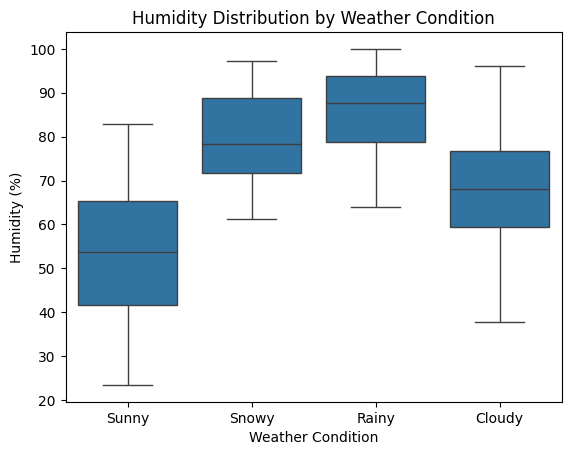

In [5]:
# Create boxplot
plt.title('Humidity Distribution by Weather Condition')
sns.boxplot(df, x='weather_condition', y='humidity_percent')
plt.xlabel('Weather Condition')
plt.ylabel('Humidity (%)')
plt.show()

Based on the boxplot, there appear to be differences in humidity across weather conditions, particularly between Sunny and Rainy conditions.

### Choose test and state hypotheses

**Test choice**: One-way ANOVA

1. **Null hypothesis**: All weather conditions have the same mean humidity
2. **Alternative hypothesis**: At least one weather condition has a different mean humidity

### Check assumptions

#### 1. Sample size

In [6]:
# Check sample sizes
print("Sample sizes:")
print(df['weather_condition'].value_counts())

Sample sizes:
weather_condition
Sunny     153
Cloudy    107
Rainy      71
Snowy      34
Name: count, dtype: int64


#### 2. Normality (Shapiro-Wilk test)

In [12]:
print("\nShapiro-Wilk test for normality:")
print()

for condition in df['weather_condition'].unique():
    condition_data = df[df['weather_condition'] == condition]['humidity_percent']
    stat, p_value = stats.shapiro(condition_data)
    print(f"  {condition}: W={stat:.4f}, p-value={p_value:.4f}")


Shapiro-Wilk test for normality:

  Sunny: W=0.9719, p-value=0.0032
  Snowy: W=0.9480, p-value=0.1070
  Rainy: W=0.9423, p-value=0.0027
  Cloudy: W=0.9916, p-value=0.7537


#### 3. Equal variances (Levene's test)

In [19]:
groups = [group['humidity_percent'].values for name, group in df.groupby('weather_condition')]
levene_stat, levene_p = stats.levene(*groups)

print(f"\nLevene's test for equal variances:")
print(f"  - Statistic: {levene_stat:.4f}")
print(f"  - p-value: {levene_p:.4f}")



Levene's test for equal variances:
  - Statistic: 7.5783
  - p-value: 0.0001


### ANOVA Test

In [ ]:
f_stat, p_value = stats.f_oneway(*groups)
alpha = 0.05

print(f"\nOne-way ANOVA Results:")
print(f"  - F-statistic: {f_stat:.4f}")
print(f"  - p-value: {p_value:.6f}")


One-way ANOVA Results:
  - F-statistic: 120.1495
  - p-value: 0.000000

Using α = 0.05:
  Reject null hypothesis
  Conclusion: Humidity IS significantly different among weather conditions


### Kruskal-Wallis H Test as a non-parametric alternative

In [20]:
kruskal_stat, kruskal_p = stats.kruskal(*groups)

print(f"\nKruskal-Wallis H Test Results:")
print(f" - H-statistic: {kruskal_stat:.4f}")
print(f" - p-value: {kruskal_p:.6f}")


Kruskal-Wallis H Test Results:
 - H-statistic: 185.5009
 - p-value: 0.000000


### Interpretation

The ANOVA test shows a highly significant difference in humidity among weather conditions (p < 0.001). Looking at the descriptive statistics and boxplot:

- Rainy days tend to have higher humidity levels
- Sunny days tend to have lower humidity levels
- Cloudy days fall in between

**Practical implications**: Weather condition is a strong predictor of humidity, which makes sense meteorologically. Rainy conditions are associated with moisture in the air, while sunny conditions typically have drier air. This relationship is important for weather forecasting and understanding atmospheric conditions.

In [10]:
# Bonus: Post-hoc pairwise comparisons with Bonferroni correction
from itertools import combinations

conditions = df['weather_condition'].unique()
comparisons = list(combinations(conditions, 2))

print("Pairwise t-tests with Bonferroni correction:")
print(f"Number of comparisons: {len(comparisons)}")
print(f"Adjusted alpha: {alpha / len(comparisons):.6f}\n")

for cond1, cond2 in comparisons:
    group1 = df[df['weather_condition'] == cond1]['humidity_percent']
    group2 = df[df['weather_condition'] == cond2]['humidity_percent']
    
    t_stat, p_val = stats.ttest_ind(group1, group2)
    significant = "***" if p_val < alpha / len(comparisons) else ""
    
    print(f"{cond1} vs {cond2}: t={t_stat:.4f}, p={p_val:.6f} {significant}")

Pairwise t-tests with Bonferroni correction:
Number of comparisons: 6
Adjusted alpha: 0.008333

Sunny vs Snowy: t=-9.9623, p=0.000000 ***
Sunny vs Rainy: t=-16.9094, p=0.000000 ***
Sunny vs Cloudy: t=-8.4775, p=0.000000 ***
Snowy vs Rainy: t=-2.8065, p=0.005991 ***
Snowy vs Cloudy: t=5.0566, p=0.000001 ***
Rainy vs Cloudy: t=10.1925, p=0.000000 ***


## Exercise 2: Testing for Association Between Weather Condition and Wind Strength

**Objective**: Determine if there is a significant association (non-random relationship) between weather condition and wind strength.

**Background**: 
If weather conditions and wind strength are independent, we would expect days to be randomly distributed across all combinations of weather condition and wind strength. However, certain weather conditions might be more likely to occur with certain wind strengths (e.g., rainy days might be associated with stronger winds). We can use a chi-square test of independence to test this.

**Tasks**:

1. **Explore the data**:
   - Check the unique values in both `weather_condition` and `wind_strength` columns
   - Count how many days fall into each category for both variables
   - Create a contingency table (crosstab) showing the count of days for each combination of weather condition and wind strength
   - Use `pd.crosstab(df['weather_condition'], df['wind_strength'])` to create this table

2. **Visualize the relationship**:
   - Create a heatmap of the contingency table to visualize the distribution of days
   - You can use `plt.imshow()` or `sns.heatmap()` if seaborn is available
   - Based on the visualization, do certain weather conditions appear to be associated with certain wind strengths?

3. **State your hypotheses**:
   - **Null hypothesis**: Weather condition and wind strength are independent (days are randomly distributed across combinations)
   - **Alternative hypothesis**: Weather condition and wind strength are associated (days are NOT randomly distributed)

4. **Perform a chi-square test of independence**:
   - Use `scipy.stats.chi2_contingency()` on your contingency table
   - This test compares the observed frequencies to expected frequencies if the variables were independent
   - Report the chi-square statistic, p-value, and degrees of freedom

5. **Interpret the results**:
   - Using α = 0.05, determine whether to reject or accept the null hypothesis
   - If you reject the null hypothesis, what does this mean in practical terms?

6. **Draw conclusions**: Are weather condition and wind strength independent or associated?

### Data exploration

In [ ]:
# Factor levels exploration
print("Unique weather conditions:")
print(df['weather_condition'].unique())
print(f"\nUnique wind strengths:")
print(df['wind_strength'].unique())

Unique weather conditions:
['Sunny' 'Snowy' 'Rainy' 'Cloudy']

Unique wind strengths:
['Light Breeze' 'Gale' 'Strong Wind' 'Calm' 'Moderate Wind']


In [12]:
# Count days in each category
print("\nWeather condition counts:")
print(df['weather_condition'].value_counts())
print("\nWind strength counts:")
print(df['wind_strength'].value_counts())


Weather condition counts:
weather_condition
Sunny     153
Cloudy    107
Rainy      71
Snowy      34
Name: count, dtype: int64

Wind strength counts:
wind_strength
Light Breeze     121
Moderate Wind     98
Calm              66
Strong Wind       55
Gale              25
Name: count, dtype: int64


In [22]:
# Create contingency table
contingency_table = pd.crosstab(df['weather_condition'], df['wind_strength'])
print("\nContingency Table:")
print(contingency_table)


Contingency Table:
wind_strength      Calm  Gale  Light Breeze  Moderate Wind  Strong Wind
weather_condition                                                      
Cloudy               14     7            43             27           16
Rainy                15     5            22             16           13
Snowy                 5     4            13             10            2
Sunny                32     9            43             45           24


### Plot contingency table heatmap

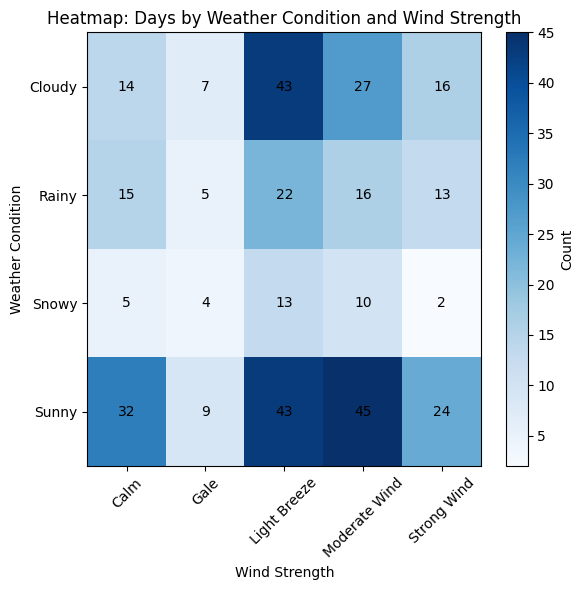

In [26]:
plt.figure(figsize=(6, 6))
plt.title('Heatmap: Days by Weather Condition and Wind Strength')
plt.imshow(contingency_table, cmap='Blues', aspect='auto')
plt.colorbar(label='Count')
plt.xticks(range(len(contingency_table.columns)), contingency_table.columns, rotation=45)
plt.yticks(range(len(contingency_table.index)), contingency_table.index)
plt.xlabel('Wind Strength')
plt.ylabel('Weather Condition')

# Add count labels to cells
for i in range(len(contingency_table.index)):
    for j in range(len(contingency_table.columns)):
        plt.text(j, i, contingency_table.iloc[i, j], ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

Based on the heatmap, there appear to be some patterns - certain combinations occur more or less frequently than others.

### Hypothesis

- **Null hypothesis**: Weather condition and wind strength are independent
- **Alternative hypothesis**: Weather condition and wind strength are associated

### Chi-square test

In [29]:
chi2_stat, p_value, dof, expected_freq = stats.chi2_contingency(contingency_table)

print(f"\nChi-square Test Results:")
print(f" - Chi-square statistic: {chi2_stat:.4f}")
print(f" - p-value: {p_value:.6f}")
print(f" - Degrees of freedom: {dof}")


Chi-square Test Results:
 - Chi-square statistic: 10.7934
 - p-value: 0.546705
 - Degrees of freedom: 12


### Interpretation

With α = 0.05, accept the null hypothesis and conclude that weather condition and wind strength are independent.

## Exercise 3: Testing for Relationship Between Humidity and Pressure

**Objective**: Determine if there is a significant linear relationship between humidity (%) and atmospheric pressure (hPa).

**Background**: 
When working with two continuous variables, we can test whether they are correlated. Correlation measures the strength and direction of a linear relationship. In meteorology, understanding relationships between variables like humidity and pressure can help improve weather predictions.

**Tasks**:

1. **Explore the data**:
   - Check for any missing values in `humidity_percent` and `pressure_hpa`
   - Calculate basic descriptive statistics (mean, std, min, max) for both variables
   - Create a scatter plot of humidity vs. pressure
   - Based on the visualization, do you think there's a relationship? If so, is it positive or negative?

2. **Choose an appropriate correlation test**:
   - Since we have two continuous variables, we can use Pearson or Spearman correlation
   - Pearson correlation measures linear relationships and assumes normality
   - Spearman correlation measures monotonic relationships and is more robust
   - Check the distributions of both variables (histograms or Q-Q plots) to help decide
   - State your null and alternative hypotheses

3. **Perform the correlation test**:
   - Calculate both Pearson and Spearman correlation coefficients
   - Use `scipy.stats.pearsonr()` and `scipy.stats.spearmanr()`
   - Report the correlation coefficient (r) and p-value for each test
   - Using α = 0.05, determine whether the correlation is statistically significant

4. **Interpret the correlation coefficient**:
   - What is the direction of the relationship (positive or negative)?
   - What is the strength of the relationship? (Hint: |r| < 0.3 weak, 0.3-0.7 moderate, > 0.7 strong)
   - Calculate the coefficient of determination (r²) - what percentage of variance in one variable is explained by the other?

5. **Draw conclusions**:
   - Is there a statistically significant relationship between humidity and pressure?
   - Is the relationship strong enough to be practically useful?

### Data exploration

In [30]:
# Check for missing values
print("Missing values:")
print(f"Humidity: {df['humidity_percent'].isna().sum()}")
print(f"Pressure: {df['pressure_hpa'].isna().sum()}")

Missing values:
Humidity: 0
Pressure: 0


In [31]:
# Descriptive statistics
print("\nHumidity statistics:")
print(df['humidity_percent'].describe())
print("\nPressure statistics:")
print(df['pressure_hpa'].describe())


Humidity statistics:
count    365.000000
mean      66.182740
std       18.232318
min       23.400000
25%       53.900000
50%       66.800000
75%       79.400000
max      100.000000
Name: humidity_percent, dtype: float64

Pressure statistics:
count     365.000000
mean     1012.346301
std         7.437610
min       983.700000
25%      1007.500000
50%      1013.200000
75%      1017.600000
max      1039.000000
Name: pressure_hpa, dtype: float64


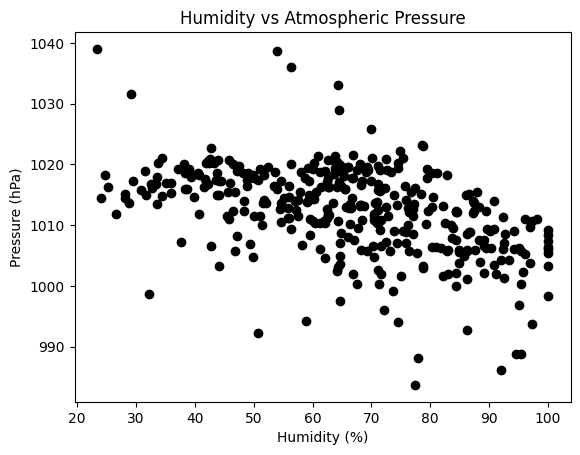

In [35]:
# Scatter plot
plt.scatter(df['humidity_percent'], df['pressure_hpa'], color='black')
plt.xlabel('Humidity (%)')
plt.ylabel('Pressure (hPa)')
plt.title('Humidity vs Atmospheric Pressure')
plt.show()

Based on the scatter plot, there may be a slight negative relationship between humidity and pressure.

### Test selection

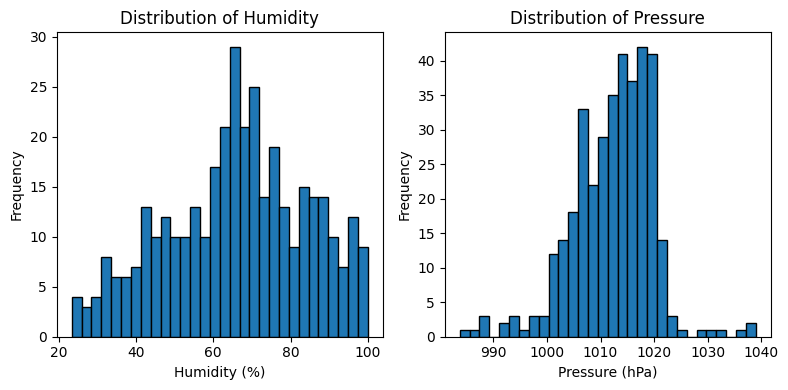

In [37]:
# 2. Check distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.hist(df['humidity_percent'], bins=30, edgecolor='black')
ax1.set_xlabel('Humidity (%)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Humidity')

ax2.hist(df['pressure_hpa'], bins=30, edgecolor='black')
ax2.set_xlabel('Pressure (hPa)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Pressure')

plt.tight_layout()
plt.show()

**Hypotheses**:
 - Null hypothesis: There is no correlation between humidity and pressure (r = 0)
 - Alternative hypothesis: There is a correlation between humidity and pressure (r ≠ 0)

### Correlation tests

In [39]:
pearson_r, pearson_p = stats.pearsonr(df['humidity_percent'], df['pressure_hpa'])
spearman_r, spearman_p = stats.spearmanr(df['humidity_percent'], df['pressure_hpa'])

print("Pearson Correlation:")
print(f"  - r = {pearson_r:.4f}")
print(f"  - p-value = {pearson_p:.6f}")

print("\nSpearman Correlation:")
print(f"  - r = {spearman_r:.4f}")
print(f"  - p-value = {spearman_p:.6f}")

Pearson Correlation:
  - r = -0.4710
  - p-value = 0.000000

Spearman Correlation:
  - r = -0.5033
  - p-value = 0.000000


### Interpretation

In [40]:
r_squared = pearson_r ** 2
print(f"\nCoefficient of determination (r²): {r_squared:.4f}")


Coefficient of determination (r²): 0.2218


With an alpha level of 0.05, we reject the null hypothesis for both Pearson and Spearman tests, indicating a significant correlation between humidity and pressure. The Pearson correlation coefficient is negative, suggesting a negative relationship, and its absolute value indicates a moderate strength. The coefficient of determination (r²) shows that approximately 22% of the variance in pressure can be explained by humidity.

**Conclusion**

Yes, there is a relationship between humidity and pressure. Since almost one quarter of the variation in pressure can be explained by humidity, this relationship is strong enough to be practically useful.

### Extra: scatter plot with regression line

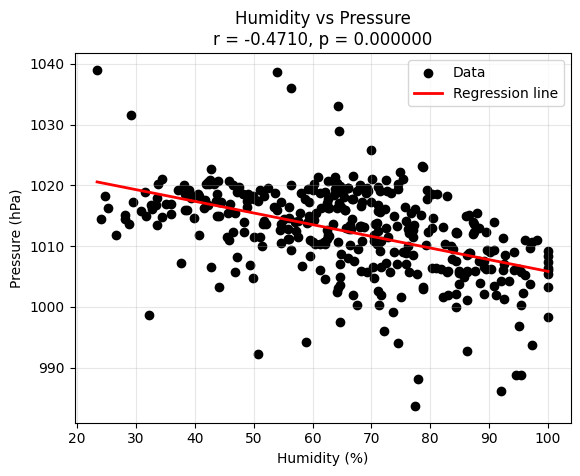

In [41]:
# Visualize with regression line
plt.scatter(df['humidity_percent'], df['pressure_hpa'], color='black', label='Data')

# Fit line
coeffs = np.polyfit(df['humidity_percent'], df['pressure_hpa'], 1)
poly = np.poly1d(coeffs)
x_line = np.linspace(df['humidity_percent'].min(), df['humidity_percent'].max(), 100)
plt.plot(x_line, poly(x_line), 'r-', linewidth=2, label='Regression line')

plt.xlabel('Humidity (%)')
plt.ylabel('Pressure (hPa)')
plt.title(f'Humidity vs Pressure\nr = {pearson_r:.4f}, p = {pearson_p:.6f}')
plt.legend()
plt.grid(alpha=0.3)
plt.show()